In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [42]:
df = pd.read_csv("loan.csv")

In [5]:
df.columns

Index(['age', 'gender', 'occupation', 'education_level', 'marital_status',
       'income', 'credit_score', 'loan_status'],
      dtype='object')

In [6]:
df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


In [43]:
df["gender"].unique()

array(['Male', 'Female'], dtype=object)

In [11]:
df.columns

Index(['age', 'gender', 'occupation', 'education_level', 'marital_status',
       'income', 'credit_score', 'loan_status'],
      dtype='object')

In [19]:
#i = ["gender","occupation","education_level","martial_status","loan_status"]
for i in df:

    print(i,": \n")
    print(df[i].unique(),"\n")


age : 

[32 45 28 51 36 24 42 29 37 48 55 31 26 39 44 27 34 41 30 53 38 25 46 33
 40 35 43 49 54 47 52 50] 

gender : 

['Male' 'Female'] 

occupation : 

['Engineer' 'Teacher' 'Student' 'Manager' 'Accountant' 'Nurse' 'Lawyer'
 'Artist' 'IT' 'Doctor' 'Consultant' 'Analyst' 'Salesman' 'Marketing'
 'Architect' 'Designer' 'Pharmacist' 'Researcher' 'Professor' 'Pilot'
 'Receptionist' 'Banker' 'Writer' 'Chef' 'Veterinarian' 'Sales' 'HR'
 'Electrician' 'Realtor' 'Photographer' 'Editor' 'Programmer' 'Dentist'
 'Musician' 'Psychologist' 'Server' 'Software' 'Stylist'] 

education_level : 

["Bachelor's" "Master's" 'High School' "Associate's" 'Doctoral'] 

marital_status : 

['Married' 'Single'] 

income : 

[ 85000  62000  25000 105000  75000  48000 120000  38000  92000 180000
 110000  68000  42000  78000  95000  52000  88000 125000  72000  98000
  80000  35000 115000  45000  60000  70000  90000  55000  65000  40000
 140000  30000 100000  28000  82000  58000  50000 130000 175000  32000] 

credi

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              61 non-null     int64 
 1   gender           61 non-null     object
 2   occupation       61 non-null     object
 3   education_level  61 non-null     object
 4   marital_status   61 non-null     object
 5   income           61 non-null     int64 
 6   credit_score     61 non-null     int64 
 7   loan_status      61 non-null     object
dtypes: int64(3), object(5)
memory usage: 3.9+ KB


In [23]:
df.isnull().sum()

,0
age,0
gender,0
occupation,0
education_level,0
marital_status,0
income,0
credit_score,0
loan_status,0


In [24]:
df.describe()

,age,income,credit_score
count,61.000000,61.000000,61.000000
mean,37.081967,78983.606557,709.836066
std,8.424755,33772.025802,72.674888
min,24.000000,25000.000000,560.000000
25%,30.000000,52000.000000,650.000000
50%,36.000000,78000.000000,720.000000
75%,43.000000,98000.000000,770.000000
max,55.000000,180000.000000,830.000000


In [44]:
data = df[df["loan_status"]=='Approved'].groupby("occupation")["occupation"].count()
data.reset_index(name="count")

,occupation,count
0,Accountant,2
1,Analyst,2
2,Architect,2
3,Banker,2
4,Chef,2
5,Consultant,2
6,Dentist,1
7,Doctor,2
8,Editor,1
9,Electrician,1


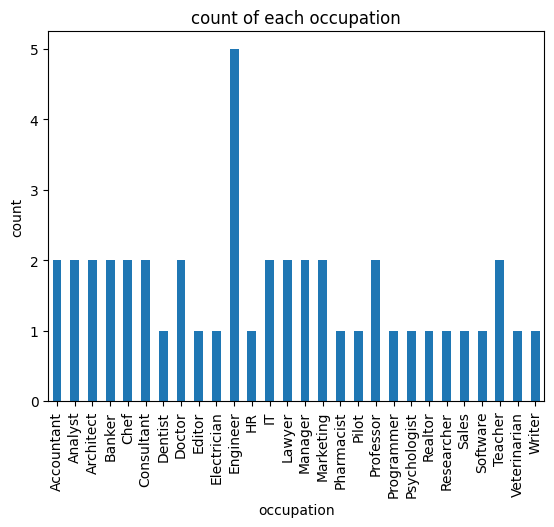

In [35]:
data.plot(kind="bar",x = "occupation" , y="count")
plt.ylabel("count")
plt.xlabel("occupation")
plt.title("count of each occupation")
plt.show()

In [46]:
data1 = df[df["loan_status"]=='Approved'].groupby("gender")["gender"].value_counts()
data1.reset_index()

,gender,count
0,Female,19
1,Male,26


In [50]:
data = df[df["loan_status"]=='Approved'].groupby("education_level")["education_level"].value_counts()
data.reset_index(name = "count")

,education_level,count
0,Associate's,2
1,Bachelor's,17
2,Doctoral,10
3,High School,1
4,Master's,15


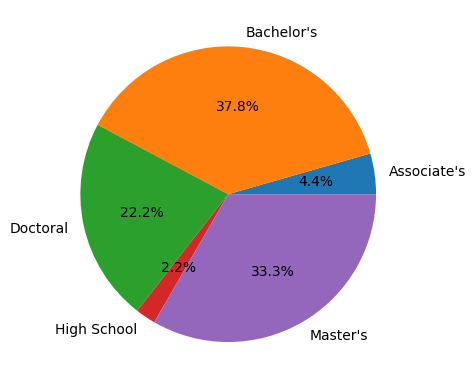

In [57]:
plt.pie(data,labels = data.index,autopct='%0.1f%%')
plt.show()

<Axes: xlabel='income', ylabel='Count'>

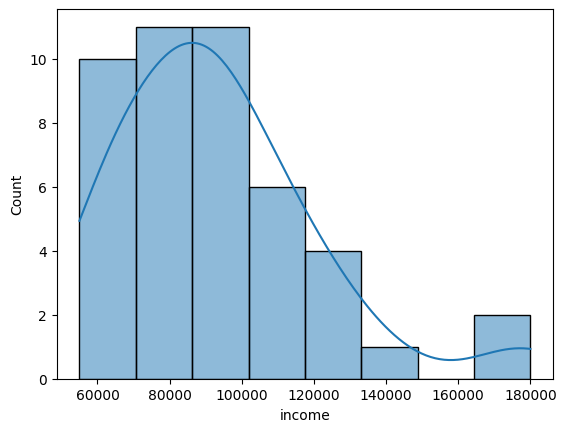

In [62]:
sns.histplot(df[df["loan_status"]=='Approved'].income,kde=True)

<Axes: xlabel='credit_score', ylabel='Count'>

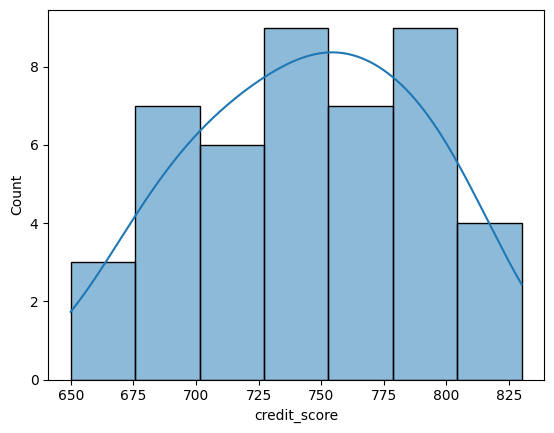

In [63]:
sns.histplot(df[df["loan_status"]=='Approved'].credit_score,kde=True)

<Axes: xlabel='credit_score', ylabel='Count'>

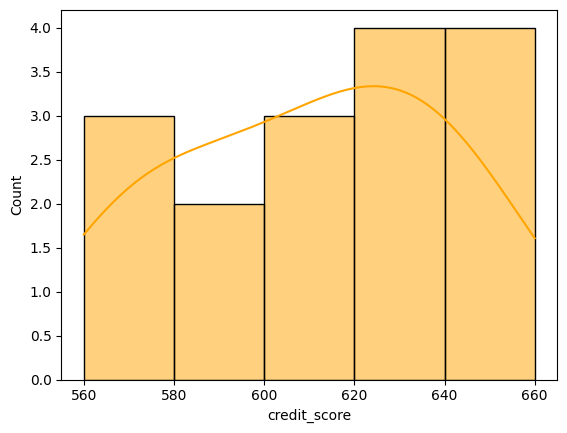

In [65]:
sns.histplot(df[df["loan_status"]=='Denied'].credit_score,kde=True,color ="orange")

In [66]:
df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


In [82]:
encode = LabelEncoder()
df["loan_status"] = encode.fit_transform(df["loan_status"])
#df['age'] = encode.fit_transform(df["age"])
df['gender'] = encode.fit_transform(df["gender"])
df['education_level'] = encode.fit_transform(df["education_level"])
df['marital_status'] = encode.fit_transform(df["marital_status"])
df['occupation']  = encode.fit_transform(df["occupation"])
df['credit_score'] = encode.fit_transform(df["credit_score"])

In [83]:
df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,1,12,1,0,85000,16,0
1,45,0,35,4,1,62000,12,0
2,28,1,33,3,1,25000,3,1
3,51,0,16,1,0,105000,22,0
4,36,1,0,1,0,75000,15,0


In [79]:
df["loan_status"].unique()

array([0, 1])

<Axes: xlabel='loan_status'>

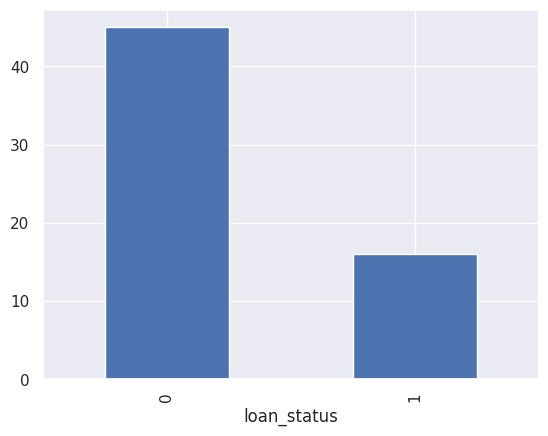

In [80]:
df["loan_status"].value_counts().plot(kind="bar")

In [86]:
x = df.drop(["loan_status"],axis=1)
y = df["loan_status"]

In [124]:
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size=0.3,random_state=42)


In [125]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(42, 7)
(19, 7)
(42,)
(19,)


In [126]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(x_train,y_train)

LogisticRegression()

In [127]:
pred = model.predict(x_test)
pred

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [128]:
acc_score = model.score(x_test,y_test)
print("Accuracy Score : ",100*acc_score)

Accuracy Score :  94.73684210526315


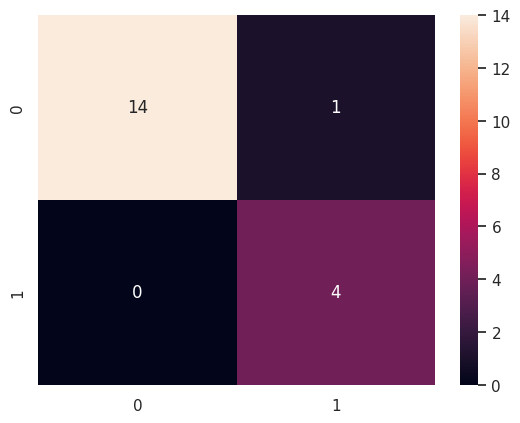

In [129]:
val = confusion_matrix(y_test,pred)
sns.heatmap(val,annot=True)
plt.show()